The gradient tensor is written $\nabla f$

The loss function is at a minimum when $w$ and $b$ are solutions of $\nabla f = 0$

The gradient of the loss with respect the weights and biases is written with this upside down triangle. The loss is at a minimum when the gradient is zero - at the bottom of the slope, when the the ground levels.

There may be more than one solution; check one against the other

The computation is prohibitively expensive

Instead use an iterative scheme

So all we have to do is solve for gradient of $f$ equals zero. Apart from the likelihood that there are many solutions - in which case we would have to compare one against the other - the computation is effectively impossible. Instead, we employ an iterative scheme that gets closer and closer to the solution in small steps. 

**Training Loop**
0. Fill weight and bias tensors with small random values
1. Draw a mini-batch of training samples and corresponding labels
2. Forward pass
3. Calculate the loss 
4. Update all parameters to lower the loss on this mini-batch
5. Exit or return to 1.

Here is the training loop again. The optimiser implements step 4.

4. `w -= step * w_gradient`, `b -= step * b_gradient` 

\begin{align*}
w &= w - \eta \nabla_w f \\
b &= b - \eta \nabla_b f
\end{align*}

$\eta$ is a small step size known as the **learning rate**

Here (at last!) is the algorithm. The gradient in the $w$ and $b$ directions is scaled by a small parameter known as the learning rate. The scaled gradient is then subtracted from the current parameter values - a small steop downhill.

The loss is the combined losses of each sample in the entire training set (the batch)

Batch gradient descent is still prohibitively expensive

Instead, calculate the loss and gradient for small, randomly selected subsets of the training set - **stochastic gradient descent**

The true loss is the combined losses of each sample in the entire training set - the batch. But even batch gradient descent is prohibitively expensive. Instead, the loss and gradient for small, randomly selected subsets of the training set is calculated. This is the 'stochastic' in **stochastic gradient descent** - the loss is approximated by the mini-batch loss. 

In [1]:
import numpy as np
def f(x, x_1, x_2, x_3, x_4):
    return (x - x_1) * (x - x_2) * (x - x_3) * (x - x_4)

def plot_loss():
    x = np.linspace(0, 10, num=101)
    x_1, x_2, x_3, x_4 = 0, 4, 7, 8
    y = f(x, x_1, x_2, x_3, x_4)

    import matplotlib.pyplot as plt
    plt.plot(x, y + 150)
    plt.figtext(0.2, 0.25, 'Global\nminimum', fontsize='large')
    plt.figtext(0.6, 0.4, 'Local\nminimum', fontsize='large')

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

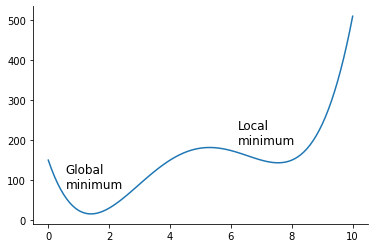

In [2]:
plot_loss()

This is a simple 1D loss function. We can see that there are two places where the gradient is zero - at the 'local' and 'global' minimum. Imagine that the weights and biases are the coordinates of a ball. Stochastic gradient descent - SGD - is equivalent to rolling the ball downhill in small steps. 

The ball might get stuck in the local minimum if the step size is too small - overshooting the minimum spot at each iteration and never climbing the barrier between the minimums.

But the ball would never find any minimum if the step size is too large. 

There is no way of knowing the optimal step size because we never know what the loss landscape looks like.

TensorFlow.Keras offers several **optimisers** SGD, Adagrad, RMSprop

Many optimsers use **momentum** to avoid getting stuck in a local optimum

TensorFlow has several optimisers - SGD, Adagrad, RMSprop and so on, and you can even create your own - in which case you will probably need that Gradient Tape code. All inbuilt optimisers implement various forms of SGD. We have the option of setting a learning rate or using the default value. Many optimisers attempt to avoid the local optimum problem by employing 'momentum'. 

Particle dynamics:
    
$\begin{cases}
v(t + \Delta t) = v(t) + a(t) \Delta t\\
x(t + \Delta t) = x(t) + v(t) \Delta t
\end{cases}$
    
Or, with $\Delta t = 1$
    
$\begin{cases}
v(t + 1) = v(t) + a(t) \\
x(t + 1) = x(t) + v(t + 1) 
\end{cases}$
    
   

Momentum is understood from the ball on slope analogy. The discretised dynamics of a particle - or ball - is governed by these update rules. An acceleration, $a$, is added to the velocity, $v$ and the velocity is added to position, $x$.

The acceleration of a ball has two parts: friction and gradient

\begin{align*}
a(t) = (\alpha - 1)v(t) - \eta \nabla f,\quad  \alpha \in [0, 1]
\end{align*}
    
\begin{align*}
\begin{cases}
v(t + 1) &= v(t) + (\alpha - 1)v(t)  - \eta \nabla f \\
         &= \alpha v(t) - \eta \nabla f  \\
x(t + 1) &= x(t) + v(t + 1) 
\end{cases}
\end{align*}

The acceleration of a ball on a slope has two parts: friction and gradient. The negative gradient is the downwards force and the opposing friction is proportional to velocity. $\alpha - 1$ is the coefficient of friction and takes values between 0 and 1. The algebra yields a simple result: the velocity is scaled by $\alpha$ and added to the learning rate times the negative gradient  

$\begin{cases}
\Delta w(t + 1) = \alpha \Delta w(t) - \eta \nabla f  \\
w(t + 1) = w(t) + \Delta w(t + 1) 
\end{cases}$

And similarly for $b$

$w$ and $b$ are updated as if they were the coordinates of a ball sliding down a rough slope. $\Delta w$ and $\Delta b$, the difference in positions over one time step, are velocity components. This scheme is called momentum because the $\alpha \Delta w$ term reinforces motion along the direction of the last change, like the momentum of a moving object.  

```
delta_w = 0
loop:
  delta_w = alpha * delta_w - eta * gradient
  w = w + delta_w
```

The momentum SGD algorithm as pseudocode. Parameter - $w$ and $b$ - update is controlled by $\alpha$ and the learning rate. The idea is that momentum carries the ball - $w$ and $b$ - over the barrier between the local and global optimum. 